<a href="https://colab.research.google.com/github/codeplinth/pytorchbootcamp/blob/master/PyTorch_23_NeuralNetwork1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
torch.manual_seed(0)

In [61]:
#make some sample data
X = torch.arange(-20,20,1).view(-1,1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

In [62]:
# The function for plotting the model
def PlotStuff(X, Y, model, epoch, leg=True):
    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'r')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

In [63]:
#Define the network
class NeuralNet(nn.Module):
  def __init__(self,D_in,H,D_out):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(in_features = D_in,out_features = H)
    self.l2 = nn.Linear(in_features = H,out_features = D_out)
    self.sigmoid = nn.Sigmoid()
  def forward(self,x):
    out1 = self.sigmoid(self.l1(x))
    y_pred = self.sigmoid(self.l2(out1))
    return y_pred


In [64]:
#create the model
model = NeuralNet(1,2,1)
model.state_dict()

OrderedDict([('l1.weight', tensor([[-0.0075],
                      [ 0.5364]])),
             ('l1.bias', tensor([-0.8230, -0.7359])),
             ('l2.weight', tensor([[-0.2723,  0.1896]])),
             ('l2.bias', tensor([-0.0140]))])

In [65]:
#create optimizer,criterion
optimizer = optim.SGD(model.parameters(),lr = 0.01)
criterion = nn.BCELoss()

In [66]:
LOSS = []
EPOCHS = 3000
def train_model(EPOCHS):
  for epoch in range(EPOCHS):
    for x,y in zip(X,Y):
      y_pred = model(x)
      loss = criterion(y_pred,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    LOSS.append(loss.item())
    if ( epoch % 300 == 0 ):
      PlotStuff(X, Y, model, epoch, leg=True)
      plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


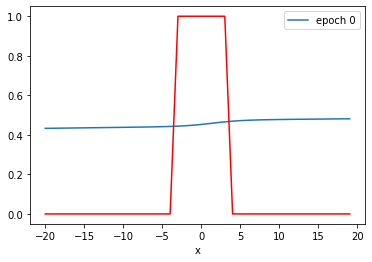

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


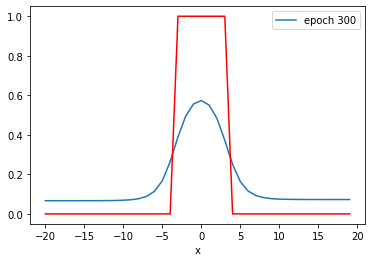

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


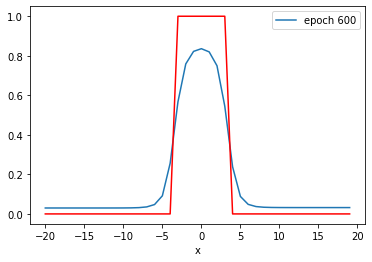

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


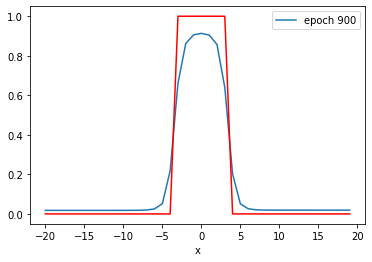

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


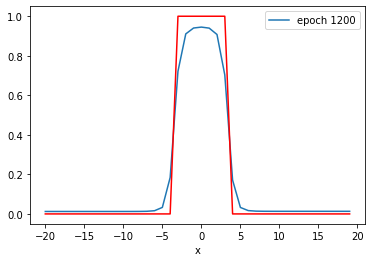

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


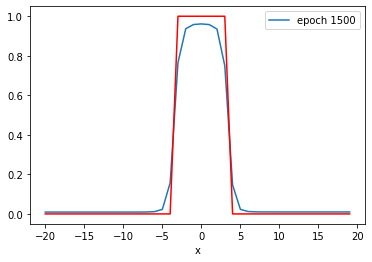

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


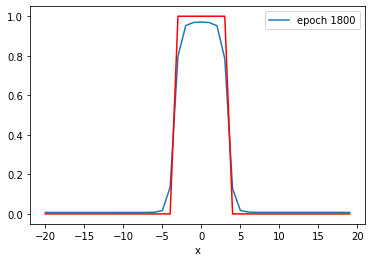

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


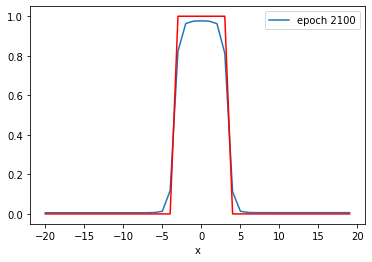

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


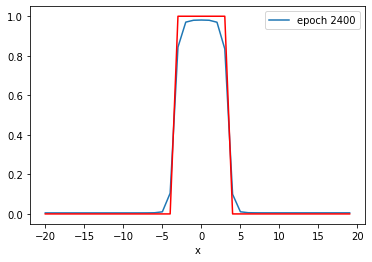

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


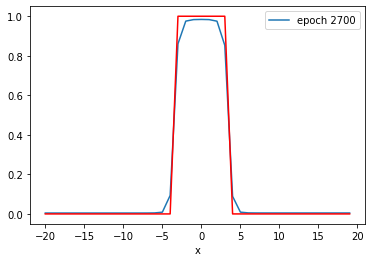

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [67]:
train_model(EPOCHS)

In [68]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([0.9861], grad_fn=<SigmoidBackward>)

In [69]:
X_=torch.tensor([[0.0],[2.0],[-30.0]])
Yhat=model(X_)
Yhat

tensor([[0.9861],
        [0.9788],
        [0.0039]], grad_fn=<SigmoidBackward>)

Text(0.5, 1.0, 'Cross Entropy loss')

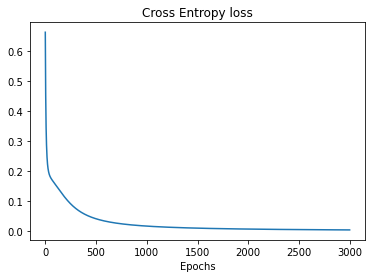

In [70]:
plt.plot(LOSS)
plt.xlabel('Epochs')
plt.title('Cross Entropy loss')